In [ ]:
#  Python Practice Example

In [1]:
# The standard start of our notebooks
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import re

Load the data set. We are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
print ('Iris feature names:', iris.feature_names)
X, Names = iris.data, iris.feature_names

##  Remove the " (cm)" part
pattern = r' \(cm\)'
for nn in np.arange(0,len(Names)):
    Names[nn] = re.sub (pattern, lambda x: "", Names[nn])
print (Names)

print (X.shape)

# Shuffle the data, but make sure that the features and accompanying lalen(bels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length', 'sepal width', 'petal length', 'petal width']
(150, 4)


Let's explore each feature, to see if any grouping exists naturally in each of them.  We'll plot histograms, because boxplots are not sensitive to such groupings.

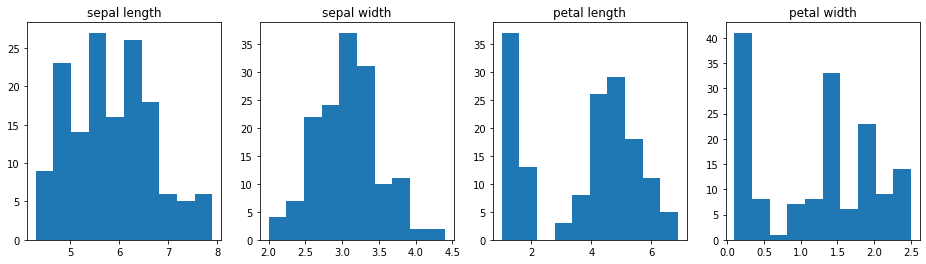

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii])
    ax.set_title(Names[ii])

plt.show()

Now let's look at some 2D combinations of features, just to help us visualize the data:

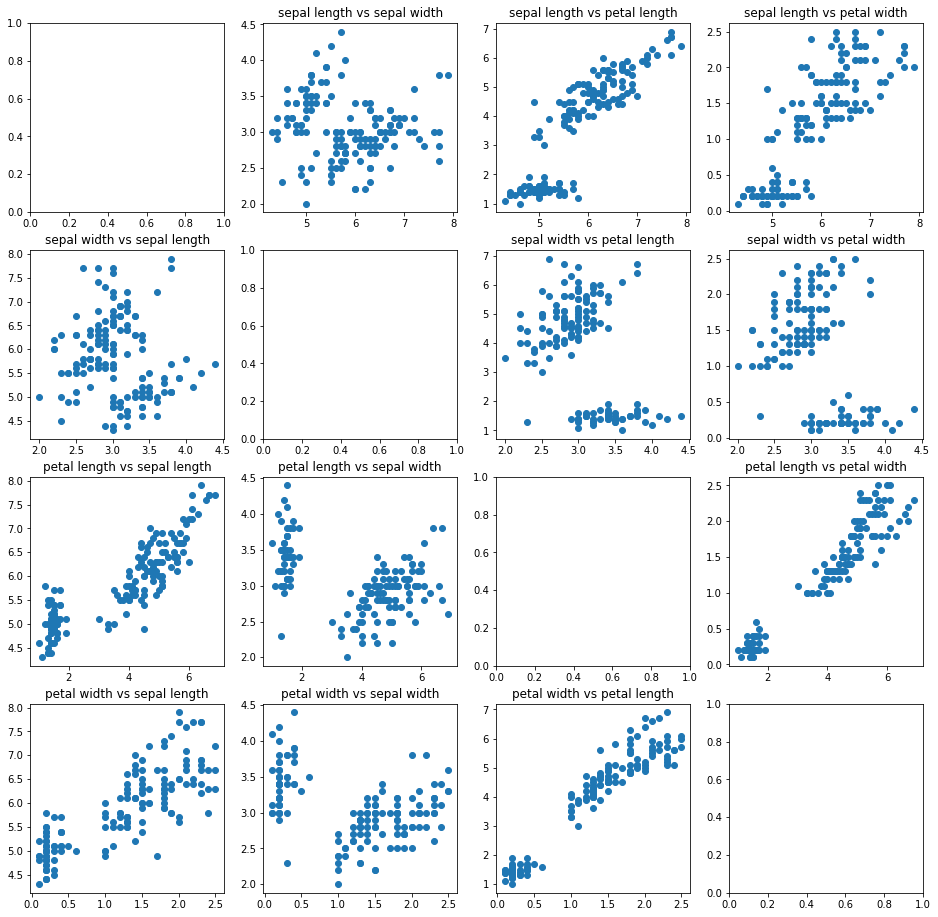

In [4]:
## Bad programming style (spaghetti code), but didn't want to add confusion about looping the features back 
# to the first one
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
        if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()